# MNIST 손글씨 - CNN v2

> 들여쓴 블록


- 2 x conv2D layers
- 1 FCN layer
- MaxPooling2D
- l output layer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

- 데이터 전처리

In [3]:
# X_train, X_test 정규화(0~1), 이미지 차원 변경

X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

 - 모델 정의 / 설정/ 학습 / 평가

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(), # MaxPooling2D(poll_size=(2,2))
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [7]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [8]:
model_path = 'best_mnist_cnn_v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [9]:
hist1 = model.fit(X_train, Y_train, validation_split=0.2,
          epochs=10000, batch_size=200,
          callbacks = [mc,es])

Epoch 1/10000
237/240 [============================>.] - ETA: 0s - loss: 0.1843 - accuracy: 0.9434
Epoch 1: val_loss improved from inf to 0.06062, saving model to best_mnist_cnn_v2.h5
240/240 [==============================] - 15s 14ms/step - loss: 0.1828 - accuracy: 0.9438 - val_loss: 0.0606 - val_accuracy: 0.9812
Epoch 2/10000
238/240 [============================>.] - ETA: 0s - loss: 0.0437 - accuracy: 0.9865
Epoch 2: val_loss improved from 0.06062 to 0.05653, saving model to best_mnist_cnn_v2.h5
240/240 [==============================] - 3s 13ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0565 - val_accuracy: 0.9849
Epoch 3/10000
239/240 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9916
Epoch 3: val_loss improved from 0.05653 to 0.03879, saving model to best_mnist_cnn_v2.h5
240/240 [==============================] - 3s 13ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0388 - val_accuracy: 0.9890
Epoch 4/10000
238/240 [====================

In [10]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0599 - accuracy: 0.9855


[0.05988255515694618, 0.9854999780654907]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [12]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)

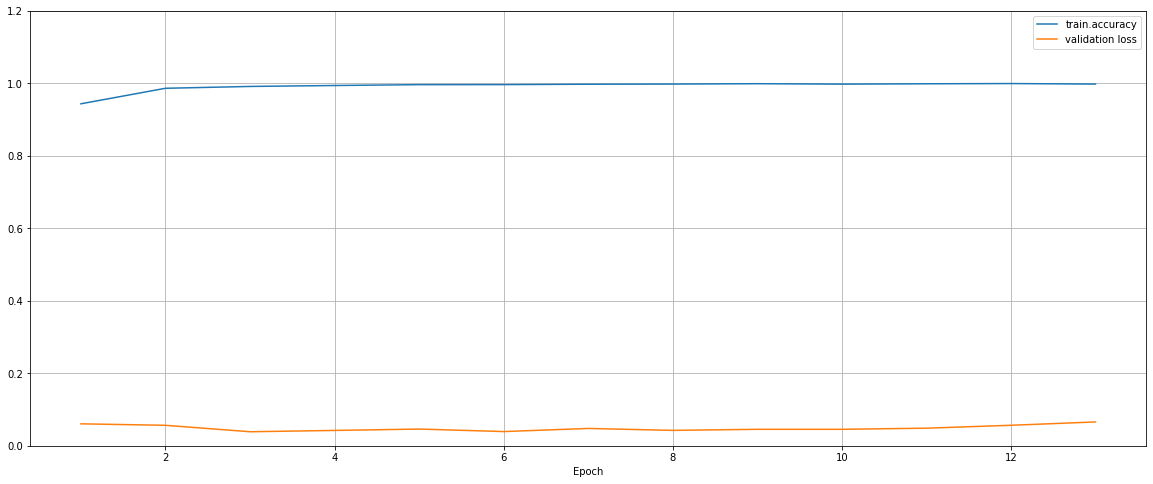

In [13]:
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()